# NOT WORKING - The Animation Does not Appear

This solution based on plotting with seaborn lineplot does not work properly ... There must be a way to get it going though, according to this [blogpost](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1).

Prerequisite for writing the result to video: Install FFMPEG, see [here](https://www.wikihow.com/Install-FFmpeg-on-Windows).

**Data Sources**

- `data/transcript.json`: Interactions for 74'000 customers with the starbucks promo app over 28 days, recorded hourly. The data is from the Starbucks Segmentation Challenge and described there in greater detail.

**Changes**

- 2019-02-18: Start project



---

## Import libraries, load data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns #, sns.set_style('whitegrid')
color = 'rebeccapurple'
# %matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Display settings
# from IPython.display import display
# pd.options.display.max_columns = 100

In [2]:
# Load data
transcript_data = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
print(len(transcript_data))
display(transcript_data.head())

306534


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


## Prepare Data

In [4]:
transcript_data.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [5]:
transcript_data['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [6]:
# Subset data
transcript = pd.DataFrame(transcript_data.groupby(['time'])['event'].count()).reset_index()

In [7]:
# Check result
assert np.sum(transcript['event']) == len(transcript_data)
print(transcript.shape)
display(transcript.head())

(120, 2)


,time,event
0,0,15561
1,6,2506
2,12,2215
3,18,2015
4,24,1921


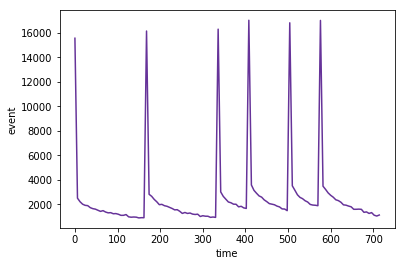

In [8]:
# Make static plot
sns.lineplot(x='time', y='event', data=transcript, color=color);

## Animate Plot

Next: Create a figure. (Make sure to set the limits for the x and y axis so your animation doesn’t jump around with the range of the data currently displayed.)

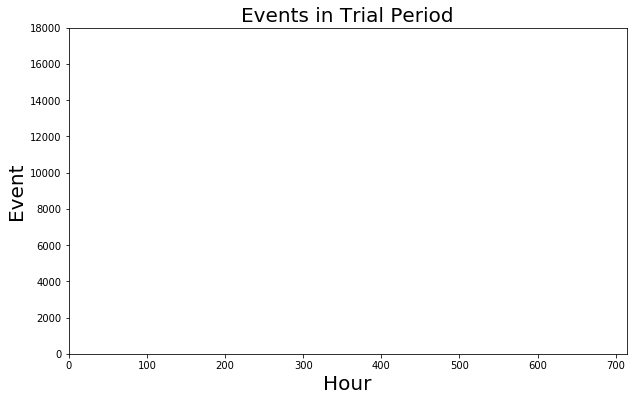

In [9]:
fig = plt.figure(figsize=(10,6))
plt.xlim(transcript['time'].min(), transcript['time'].max())
plt.ylim(0, 18000)
plt.xlabel('Hour',fontsize=20)
plt.ylabel('Event',fontsize=20)
plt.title('Events in Trial Period',fontsize=20);

The heart piece of your animation is your animation function in which you define what happens in each frame of your video. Here i represents the index of the frame in the animation. With this index you can select the data range which should be visible in this frame. After doing that I use a seaborn lineplot to plot this data selection. The last two lines are just to make the plot look a bit more pleasing.

In [10]:
def animate(i):
    data = transcript.iloc[:i+1]  # select data range
    sns.lineplot(x='time', y='event', data=data, color=color)

#     # Style
#     p.tick_params(labelsize=16)
#     plt.setp(p.lines,linewidth=3)

To start the animation use matplotlib.animation.FuncAnimation in which you link the animation function and define how many frames your animation should contain. frames therefore defines how often animate(i) is being called.

In [11]:
anim = animation.FuncAnimation(fig, animate, frames=100)

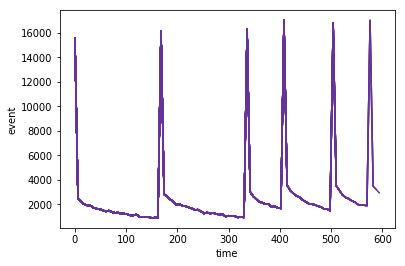

In [12]:
HTML(anim.to_html5_video())

## Write to video file

Next: Initialize a writer which uses ffmpeg and records at 20 fps with a bitrate of 1800. (You can of course pick these values yourself.)

In [13]:
# Check available writers
print('animation writers:', animation.writers.list())

animation writers: ['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [14]:
# Initialize Writer Object
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

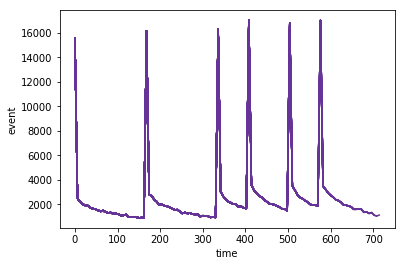

In [15]:
# Save to mp4
anim.save('events.mp4', writer=writer)

### Write to GIF

In [16]:
# # Create gif from animation (uses ImageMagick)
# gif_path = './gradient_descent.gif'
# anim.save('./gradient_descent.gif', writer='imagemagick', fps=1000/800)
# Image(url=gif_path)

---

# Plot different events separately

In [17]:
# transcript_received = transcript_data.loc[transcript_data['event'] == 'offer received']
# transcript_transaction = transcript_data.loc[transcript_data['event'] == 'transaction']
# transcript_completed = transcript_data.loc[transcript_data['event'] == 'offer completed']
# transcript_viewed = transcript_data.loc[transcript_data['event'] == 'offer viewed']

unfinished 

---